In [1]:
DATA = load("-ascii", "Measurements-A4.txt");

In [2]:
[n, _] = size(DATA)

n =  1000
_ =  9


In [3]:
function [z, R] = read_measurement(DATA, idx)
    z = DATA(idx, 1:3)';
    R = [0 DATA(idx, 5) DATA(idx, 6); 0 0 DATA(idx, 8); 0 0 0];
    R = R + R';
    R = R + diag([DATA(idx, 4) DATA(idx, 7) DATA(idx, 9)]);
endfunction

## 1. the First observation

In [4]:
[z, R] = read_measurement(DATA, 1)

z =

   20.6809
   47.2658
   -5.0128

R =

    404.00    101.81   -469.05
    101.81    639.71   -568.25
   -469.05   -568.25   1180.46



## 2. Final mean x and covariance P

In [5]:
x = zeros(3, 1);
P = 100 * eye(3);

X = zeros(n, 6);

for i=1:n
  [z, R] = read_measurement(DATA, i);
  W = P * inv(P+R);
  P -= W * P;
  x += W * (z - x);
  
  % keep track of components of x and sqrt of their respective variances
  X(i, 1:3) = x';
  X(i, 4:6) = sqrt(diag(P)');
end

x
P

x =

   16.982
   19.001
   22.995

P =

   0.00019635347  -0.00017258385   0.00001014770
  -0.00017258385   0.00036547431   0.00000053447
   0.00001014770   0.00000053447   0.00006353500



## 3. Plotting the filtering of the 3 measured components

The first a few measurements are not displayed in the plot only because the initial variance is so large that the scale of y-axis will make the rest of the plot less clear.

offset =  25


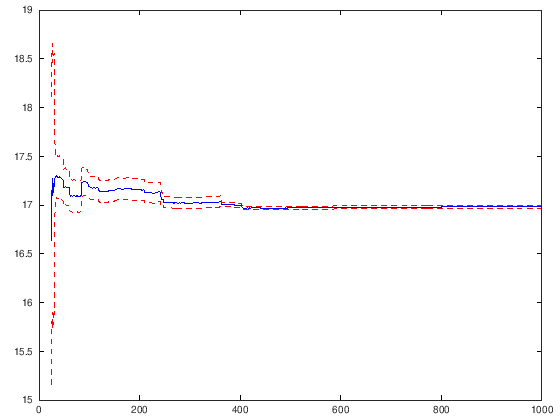

In [11]:
offset = 25
plot(offset:n, X(offset:n, 1), 'b', offset:n, X(offset:n, 1) .+ X(offset:n, 4), 'r--', offset:n, X(offset:n, 1) .- X(offset:n, 4), 'r--')

offset =  25


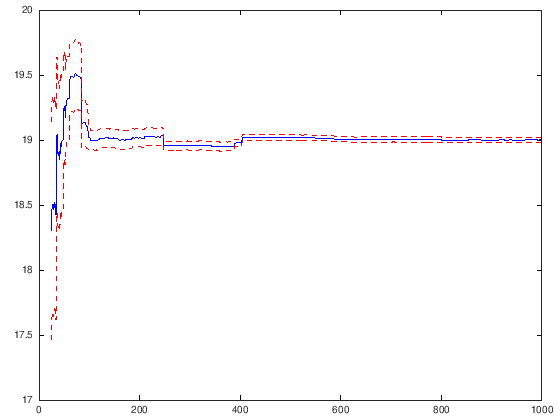

In [14]:
offset = 25
plot(offset:n, X(offset:n, 2), 'b', offset:n, X(offset:n, 2) .+ X(offset:n, 5), 'r--', offset:n, X(offset:n, 2) .- X(offset:n, 5), 'r--')

offset =  25


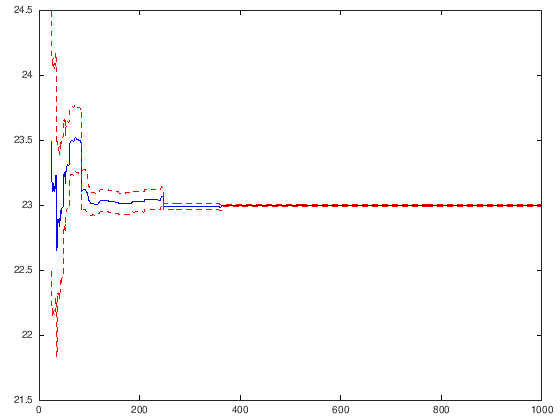

In [16]:
offset = 25
plot(offset:n, X(offset:n, 3), 'b', offset:n, X(offset:n, 3) .+ X(offset:n, 6), 'r--', offset:n, X(offset:n, 3) .- X(offset:n, 6), 'r--')